# Home assignment - Deep Learning (ITLB359, MIB)
---
## Task description
Challenge: Get the best results on the malaria dataset!

> "Malaria contains images from various cells. Some cells are infected with malaria, other cells are not. You can download the dataset. Each image is a different shape in 24-bit colour."

### Your task is as follows:
- Download the dataset from google drive like:
```py
!wget "https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0" -O malaria.zip
!unzip malaria.zip
%cd malaria
```
- Convert from image dataset to NumPy array for training:
```py
list_of_class1 = os.listdir("Parasitized")
list_of_class0 = os.listdir("Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)
```
- Split to training, validation and test sets.
- Challenge: Get the best results on the malaria dataset!
- The challenge of this task is to get the best results on the malaria dataset by tuning hyperparameters of a NN model and observing convergence behavior.
- Best - for simplicity - means the highest accuracy on the validation set.
- Reflection
- Critically evaluate your work, including other approaches.
- Answer in a markdown cell.

Added constraint: The model with the "best performance" has to be saved, so it should not be just a printout happening once during training!

**You may NOT manipulate the validation set (that is, you cannot pick and choose which samples belong to the validation set to make your model "perform" better on validation data)!**

### Please observe the following:
- You must use a single standalone Jupyter Notebook to solve the task and submit the .ipynb file.

Note for those working on Google Colab: a link to your notebook will not suffice: you have to download and submit the file itself.
Follow the principle of literate programming, and make use of the markdown cells of the notebook.
### Deadline
Monday, 5 December 2022, 10:00 AM 
### Assessment
The assignment will be assessed based on the following criteria (see the grid on Moodle):
- Specification fulfillment (50%) 
- Literate programming and markdown cells (20%) 
- Conceptual grounding (20%) 
- Clean code (10%) 
The **resit** arrangement for the assignment is the same as above; you may resubmit the same paper, with corrections, that you submitted by the original deadline. The resubmission deadline will be specified on Moodle after the grades for the original submission are published.

Upload your file (.ipynb) to Moodle.

### Academic conduct notice
Where the Academic Conduct Officer has reason to suspect that a piece of work submitted by a student was wholly or in part written by someone other than the student who submitted it, and this has not been disclosed by the student, they may call for the student to defend the work in **viva or a written comprehension test**. The burden of proof in such a viva or test will be upon the student to demonstrate to the examination panel's satisfaction his/her full comprehension of the work s/he has submitted. Failure to appear without satisfactory explanation will result in immediate failure of that assessment, with consequences of academic misconduct and application of sanctions.

---

# Introduction
In order to successfully complete this assignment, we will utilize a Jupiter notebook, or any other platform that supports an iPython notebooks. The aim of this experiment is to successfully to build a Convolutional Neural Network, to help us identify and classify, parasitic and uninfected cells from the publicly available Malaria dataset, which is provided to us by our professors. Unlike the full Malaria dataset which contains more than 27,000 cell images, this one only contains 1000 cell images. Before we begin it is important to check it if you have all the necessary libraries. You can run the following batch command to install the necessary libraries. I recommend using a virtual environment.
```bash
pip3 install numpy matplotlib tensorflow sklearn opencv-python
```
Lastly, I recommend following the instructions that can be found [on the Tensorflow website](https://www.tensorflow.org/install/pip) when installing Tensorflow, to correctly set up and utilize the computational power of the GPU.


In [ ]:
# Download the dataset from google drive
!wget "https://drive.google.com/uc?id=1dl6KXbpRrUNrH5xC26MpYq3rHjOewUTF&export=download&authuser=0" -O malaria.zip
!unzip malaria.zip
%cd malaria 

In [4]:
# Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping

After downloading the dataset and importing the necessary libraries, we will utilize the code that is provided to us by our professors to generate the image data based on the images, and assign them a label. At the end, I will show an alternative way how to do this step and the pre-process step of the images by using Tensorflow tools.

In [5]:
list_of_class1 = os.listdir("malaria/Parasitized")
list_of_class0 = os.listdir("malaria/Uninfected")

labels1 = np.ones(len(list_of_class1))
labels0 = np.zeros(len(list_of_class0))
labels = np.concatenate((labels1, labels0), axis=0)

dataset = []
dim = (100, 100)
for img in list_of_class1:
  image = cv2.imread("malaria/Parasitized/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

for img in list_of_class0:
  image = cv2.imread("malaria/Uninfected/" + str(img))
  resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  dataset.append(resized)

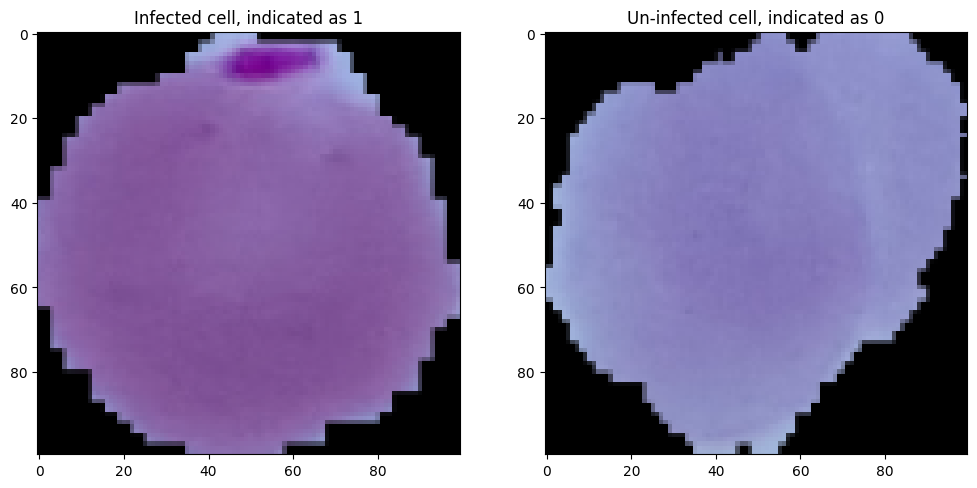

In [6]:
# Visualize the data so we can see what we are working with.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.set_title("Infected cell, indicated as 1")
ax1.imshow(dataset[0])
ax2.set_title("Un-infected cell, indicated as 0")
ax2.imshow(dataset[-1])

# The Code
Before using the data, we first have to process it by rescaling it and shuffling the image data. After processing the data, the following steps are quiet similar to other machine learning procedures. There are many ways to divide the data set into training, validation and testator, and I have stuck to Scikit-Learns train_test_split. After splitting the data set, we create the model and create a call back which will utilize Early Stopping. We will compile the model using Adam and lastly we will fit the model with these parameters. To better understand the results we will visualize the results by plotting the model's accuracy and its loss. 

In [7]:
# Make sure the data is in an array format
dataset = np.array(dataset)
labels = np.array(labels)

# Shuffle the data
n = np.arange(dataset.shape[0])
np.random.shuffle(n)
dataset = dataset[n]
labels = labels[n]

# Transform and resize
dataset = dataset.astype(np.float32)
labels = labels.astype(np.int32)
dataset = dataset/255

In [8]:
# Split into train, validation and test data
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3, random_state=69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=69)
print("", X_train.shape, "\n", y_train.shape, 
      "\n", X_val.shape, "\n", y_val.shape,
      "\n", X_test.shape, "\n", y_test.shape)

 (700, 100, 100, 3) 
 (700,) 
 (150, 100, 100, 3) 
 (150,) 
 (150, 100, 100, 3) 
 (150,)


In [9]:
# Create the model
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(100, 100, 3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(16, (3,3), activation="relu"))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(32, activation="relu"))

model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 16)       0

2022-11-26 18:38:10.542349: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Crate a callback for efficiency purposes
my_callback = EarlyStopping(monitor='accuracy',patience=3)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    steps_per_epoch = len(X_train),
                    epochs = 20,
                    validation_data = (X_val,y_val),
                    validation_steps = len(X_val),
                    callbacks=[my_callback])

Epoch 1/20


2022-11-26 18:38:19.267281: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 84000000 exceeds 10% of free system memory.


700/700 [==============================] - 6s 7ms/step - loss: 0.6974 - accuracy: 0.5014 - val_loss: 0.6920 - val_accuracy: 0.5200
Epoch 2/20
700/700 [==============================] - 4s 6ms/step - loss: 0.6934 - accuracy: 0.5229 - val_loss: 0.7006 - val_accuracy: 0.5200
Epoch 3/20
700/700 [==============================] - 4s 6ms/step - loss: 0.6901 - accuracy: 0.5743 - val_loss: 0.6894 - val_accuracy: 0.5200
Epoch 4/20
700/700 [==============================] - 4s 6ms/step - loss: 0.5608 - accuracy: 0.7043 - val_loss: 0.4466 - val_accuracy: 0.7600
Epoch 5/20
700/700 [==============================] - 4s 6ms/step - loss: 0.3257 - accuracy: 0.8629 - val_loss: 0.2834 - val_accuracy: 0.9067
Epoch 6/20
700/700 [==============================] - 4s 6ms/step - loss: 0.2496 - accuracy: 0.9000 - val_loss: 0.3561 - val_accuracy: 0.8800
Epoch 7/20
700/700 [==============================] - 4s 6ms/step - loss: 0.1646 - accuracy: 0.9429 - val_loss: 0.2767 - val_accuracy: 0.9200
Epoch 8/20
700/70

Here we can see that the training model was improving over time however, after the 12th epoch, the training data started to incrase on the loss. On the other hand, the validation data became worse after the fourth-sixth epoch. Therefore we can safely say that the model is overfitting after more than 5 epochs. On the other hand, we can see a sharp increase in the models accuracy in both training and validation dataset. However after the fourth epoch, there seems to be no additional increases in accuracy for validation dataset, and only minimal increases in the model accuracy for the training data set.

Maximum Loss : 0.6974

Minimum Loss : 0.0207

Loss difference : 0.6768


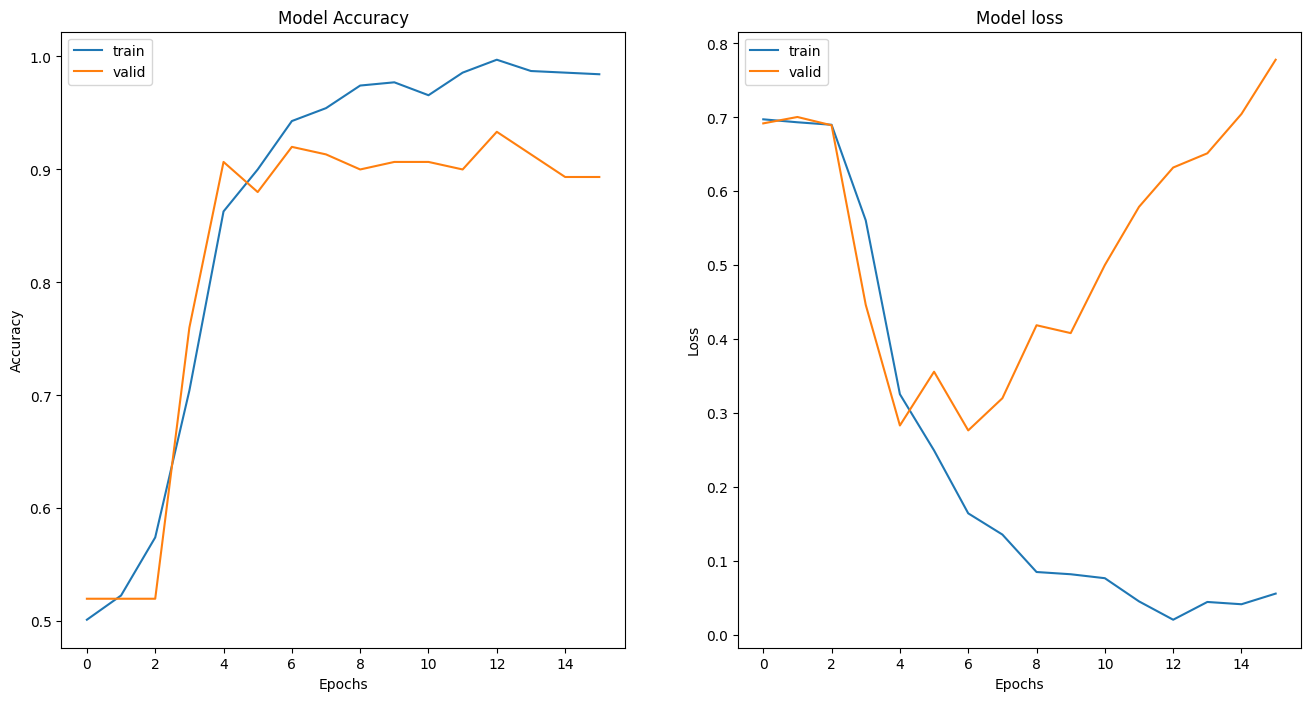

In [12]:
# Plot the accuracy and loss
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.set_title('Model Accuracy')
ax1.plot(history.history['accuracy'])
ax1.plot(history.history['val_accuracy'])
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.legend(['train', 'valid'], loc='upper left')

ax2.set_title('Model loss')
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend(['train', 'valid'], loc='upper left')

max_loss = np.max(history.history['loss'])
min_loss = np.min(history.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("")
print("Minimum Loss : {:.4f}".format(min_loss))
print("")
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

To see how the model fared with the testing dataset, we have evaluated both X_test and y_test data, and we can see that the accuracy of the test dataset is at 86%. Which means that roughly 9 in 10 instances when we classify the malaria dataset, it will predict correctly. To visualize the data that we have used to predict, I have predicted some of the data from the X_test set, and I will also plot the results for better visualization. 

In [13]:
# Now we can check the accuracy of our model
print("Evaluating on training set...")
(loss, accuracy) = model.evaluate(X_train, y_train)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

print("Evaluating on testing set...")
(loss, accuracy) = model.evaluate(X_test, y_test)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Evaluating on training set...


2022-11-26 18:40:08.307369: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 84000000 exceeds 10% of free system memory.


22/22 [==============================] - 1s 20ms/step - loss: 0.0071 - accuracy: 0.9986
loss=0.0071, accuracy: 99.8571%
Evaluating on testing set...
5/5 [==============================] - 0s 18ms/step - loss: 0.7915 - accuracy: 0.8600
loss=0.7915, accuracy: 86.0000%


In [14]:
# Test the actual model on the test data
pred_array=[]
for i in range(30):
    img = X_test[i]
    img = img.reshape(-1,100,100,3)
    pred_val = model.predict(img)
    if(pred_val > 0.5):
        pred_val = 1
    else:
        pred_val = 0
    pred_array.append(pred_val)

# Print out results
print("Predicted Values:", pred_array)
print("Actual Values:", y_test[:30])

1/1 [==============================] - 0s 19ms/step
Predicted Values: [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1]
Actual Values: [1 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1]


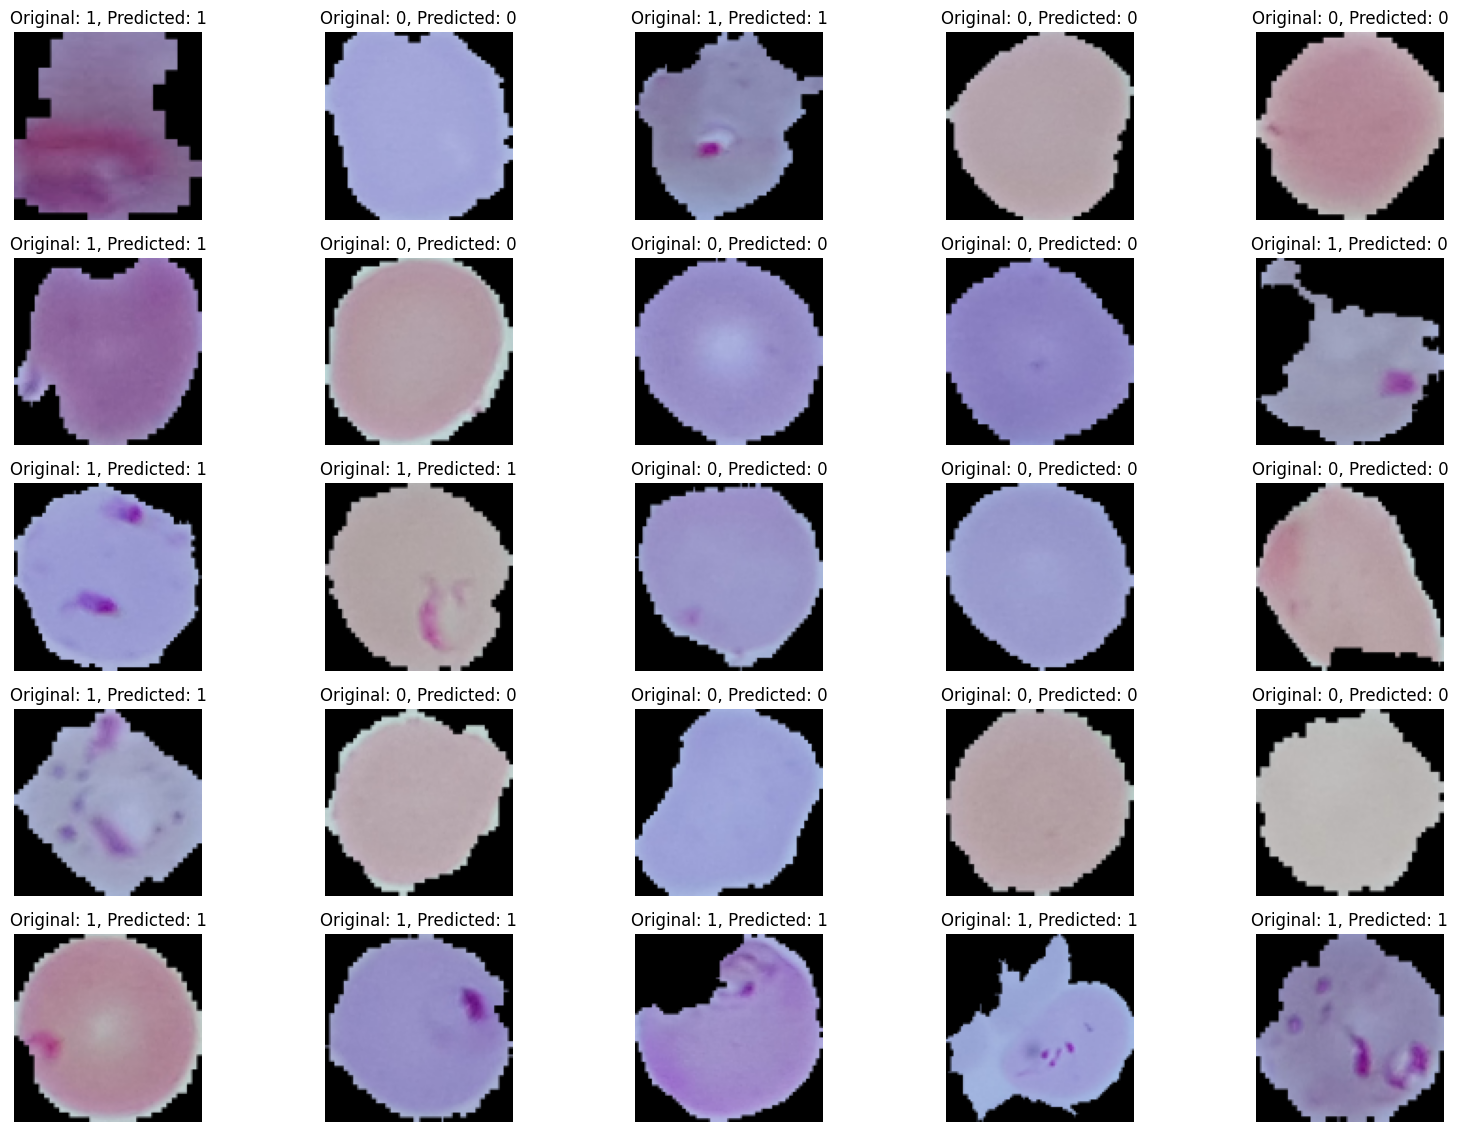

In [15]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i])
    plt.title('Original: {}, Predicted: {}'.format(y_test[i], pred_array[i]))
    plt.axis('Off')

plt.subplots_adjust(left=1.5, right=3, top=1.2)
plt.show()

In [16]:
# Lastly, we will save the model.
model.save('my_model.h5')

As I have said in the beginning, there is another way to divide the the images dataset into their respective image components and labels by utilizing one of tensorflows tools which is called ImageDataGenerator, which also helps us in pre-processing and rescaling data. After that we apply the flow_from_directory() function and assign it our directory, in this case 'malaria'. It is also possible to [generate a validation data set.](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set image height and width
dim = (100,100)

# Generate all necessary info and preprocessing
datagen = ImageDataGenerator(rescale = 1/255)

# Create dataset and labels
data_generator = datagen.flow_from_directory(directory="malaria", class_mode="binary", target_size = dim, batch_size=len(os.listdir('malaria/Parasitized')*len(os.listdir('malaria'))))

Found 1000 images belonging to 2 classes.


I have printed out the results from the ImageDataGenerator and we can see that they are virtually identical to the ones that we have used previously.

In [18]:
# Print out the labels to observe
X, y = data_generator.next()

print("Image Data: ")
print(X[0])
print()
print("Image Label: ")
print(y[0])

Image Data: 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]

Image Label: 
1.0


# Conclusion

# References

Fuhad, K.M. et al. (2020) “Deep learning based automatic malaria parasite detection from blood smear and its smartphone based application,” Diagnostics, 10(5), p. 329. Available at: https://doi.org/10.3390/diagnostics10050329. 